In [1]:
import json
import sklearn
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
for dirname, _, filenames in os.walk('./data/Desi_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/Desi_data/StreamingHistoryDesi.json
./data/Desi_data/artist_data.json
./data/Desi_data/album_data.json
./data/Desi_data/listened_filtered_raw.pkl
./data/Desi_data/listened_raw.pkl
./data/Desi_data/track_data.json


In [3]:
data = pd.read_pickle("./data/Desi_data/listened_filtered_raw.pkl")

In [4]:
data.trackFeatures[0]

[{'danceability': 0.657,
  'energy': 0.467,
  'key': 5,
  'loudness': -8.925,
  'mode': 1,
  'speechiness': 0.0341,
  'acousticness': 0.667,
  'instrumentalness': 1.92e-06,
  'liveness': 0.0295,
  'valence': 0.276,
  'tempo': 100.139,
  'type': 'audio_features',
  'id': '2fytePz8UsbUr8n33QBEcm',
  'uri': 'spotify:track:2fytePz8UsbUr8n33QBEcm',
  'track_href': 'https://api.spotify.com/v1/tracks/2fytePz8UsbUr8n33QBEcm',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2fytePz8UsbUr8n33QBEcm',
  'duration_ms': 251760,
  'time_signature': 4}]

In [5]:
track_features_tensor = []
for i, row in data.iterrows():
    tf = row["trackFeatures"][0]
    features_vector = [tf["danceability"], tf["energy"],  tf["key"],  tf["loudness"],
                tf["speechiness"],  tf["acousticness"],  tf["instrumentalness"],
                tf["liveness"],  tf["valence"],  tf["tempo"]]
    track_features_tensor.append(features_vector)

In [6]:
track_features_tensor = np.array(track_features_tensor)

In [7]:
tf_embed = TSNE(n_components=2, learning_rate=300, init="pca").fit_transform(track_features_tensor)

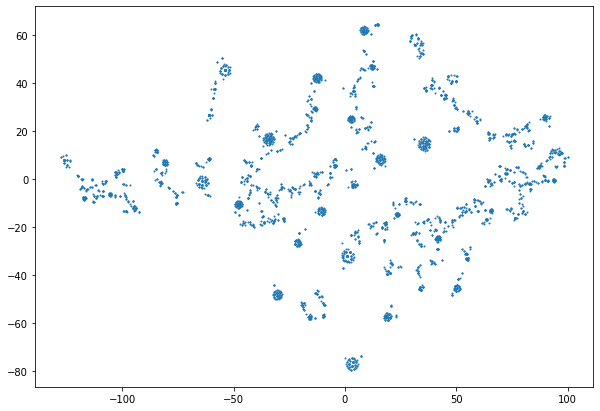

In [8]:
plt.figure(figsize=(10, 7))
plt.scatter(tf_embed[:, 0], tf_embed[:, 1], s=1)

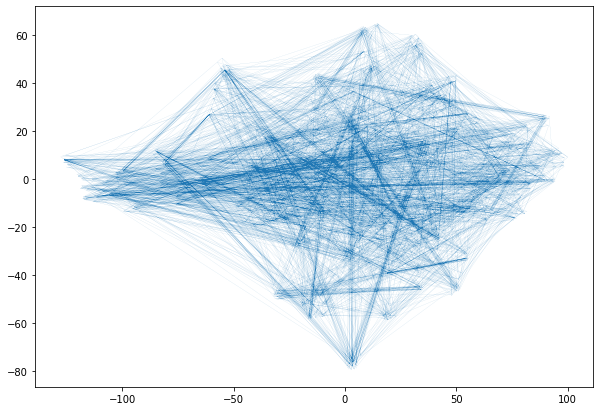

In [118]:
plt.figure(figsize=(10, 7))
plt.plot(tf_embed[:, 0], tf_embed[:, 1], linewidth=0.05)

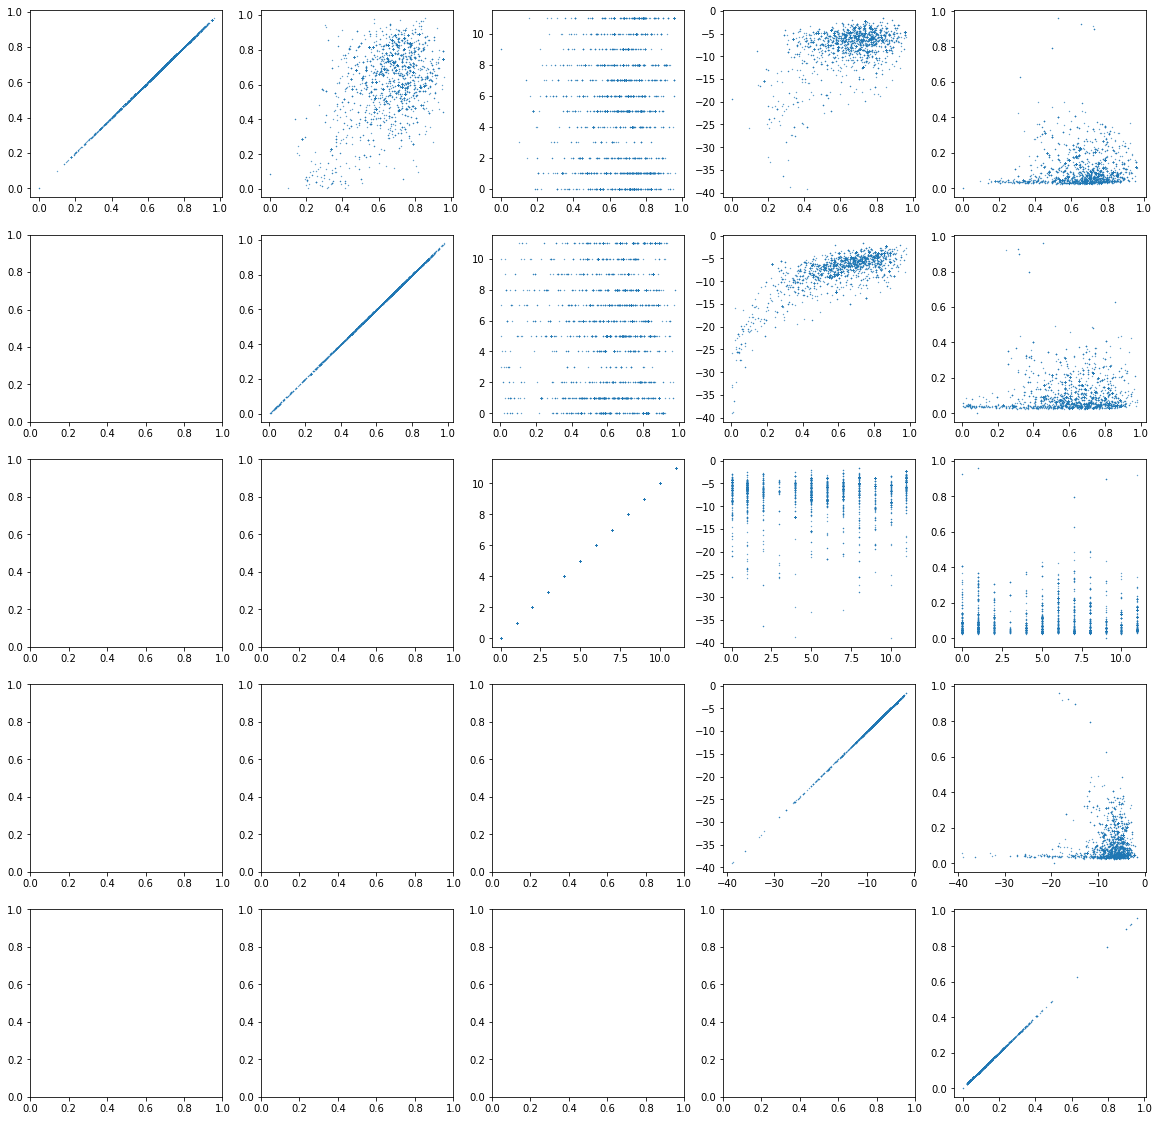

In [138]:
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
for i in range(5):
    for j in range(i, 5):
        axs[i, j].scatter(track_features_tensor[:, i], track_features_tensor[:, j], s=0.1)


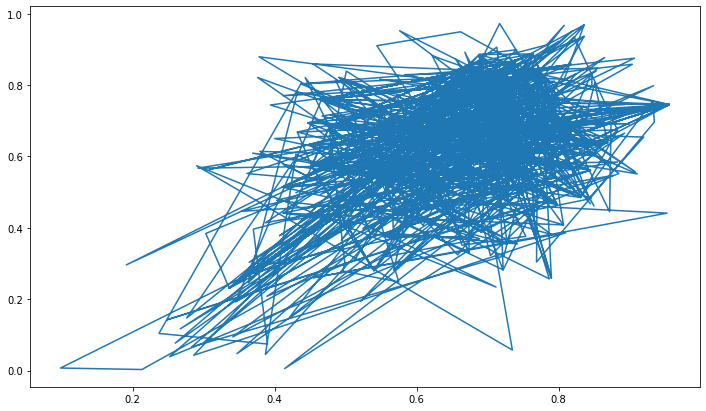

In [155]:
x = track_features_tensor[:1000, 0]
y = track_features_tensor[:1000, 1]
plt.figure(figsize=(12, 7))
# plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, pivot="middle", width=0.001)
# 
plt.plot(x, y)
plt.show()

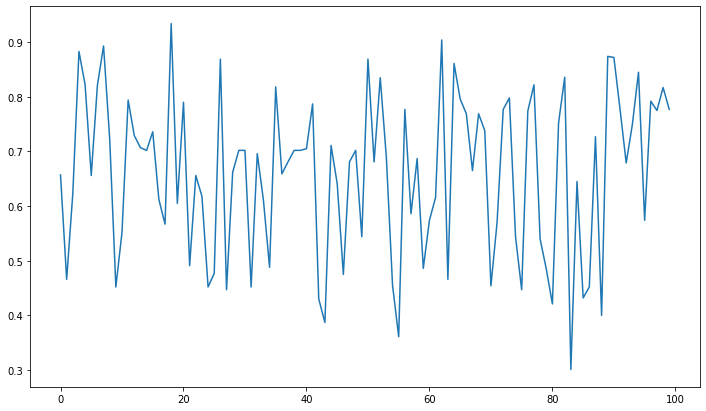

In [10]:
x = track_features_tensor[:100, 0]
# y = track_features_tensor[:1000, 1]
plt.figure(figsize=(12, 7))
# plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, pivot="middle", width=0.001)
# 
plt.plot(np.arange(100), x)
plt.show()